# Explications concerning the modelling of the hydrogen storage


We model in this code the hydrogen storage that could be used in an airplane. All the explications that we are going to give are taken from the article “Modelling and Designing Cryogenic Hydrogen Tanks for Future Aircraft Applications” written by Christopher Winnefeld, Thomas Kadyk, Boris Bensmann, Ulrike Krewer and Richard Hanke-Rauschenbach.

## Tank  design

Firstly, you will have to enter some parameters that characterize the storage that you want to model:

-   $ E_{req-MJ} $ [MJ]: value of the energy that is required for the flight mission (in MJ). For instance, 6 MWh (21.6 GJ) is the required energy for a 200nm flight with a 3MW electric propulsion. 1000 MJ is about 8kg of hydrogen, which is a container suitable for cars.
-   geometry: Type of the geometry of the chosen tank (could be a sphere, cylindre or an ellipsoide)

Some useful parameters are given and they depend on the design choices (material, intern pressure, insulation...). 

-   $ p_{v} $ [bar]: venting pressure that corresponds to the maximum allowable pressure inside the tank. In fact, once the pressure reaches the maximum allowable tank pressure, venting might be necessary to keep or decrease the pressure level.
-   $ p_{fill} $ [bar]: filling pressure (pressure inside the tank)
-   $ K_{MPa} $ [MPa]: maximum stress for the tank material (in MPa)
-   $ E_{Y-GPa} $ [GPa]: value of Young's Modulus for tank's material (in GPa)
-   S: value of the safety factor
-   $ \rho_{w} $ [kg/m^3]: density of the material used for the tank's wall
-   $ \rho_{is} $ [kg/m^3]: density of the material used for the tank's insulation
-	$ s_{ins} $ [m]: insulation thickness;
-	$ T_{int} $ [K]= Temperature of hydrogen inside the tank;
-	$ T_{ext} $ [K]= Temperature of environment outside the tank;
-	$ \lambda_{ins} $ [W/(mK)]= conductivity coefficient of insulation material;
-	$ \lambda_{tank} $ [W/(mK)]= conductivity coefficient of tank’s wall;
-	$ h_{H2-tank} $ [W/(Km^2)]= convection coefficient of hydrogen for internal convection;
-	$ h_{ins-air} $ [W/(Km^2)]= convection coefficient of air for external convection	

The order of magnitude of these inputs that we proposed in the code derive from materials’ characteristics ($ K_{MPa} $, $ E_{Y-GPa} $, $ \rho_{is} $, $ \rho_{w} $, $ \lambda_{ins} $, $ \lambda_{tank} $, etc). As far as other of these inputs are concerned, we had to assume them as we didn’t find a well defined value ($ h_{H2-tank} $, $ h_{ins-air} $). About all the other inputs, in order to define their order of magnitude, we used the already mentioned scientific article “Modelling and Designing Cryogenic Hydrogen Tanks for Future Aircraft Applications”.

## Geometrical Design of the tank: 

Firstly, the code will determine the tank intern volume that is needed for the flight mission. So, to calculate this volume, we need first to know which volume of hydrogen is needed. 
For that, the code is going to compute the fraction of liquid hydrogen in the tank (and so the fraction of gaseous hydrogen). We determined a relation between the fraction of liquid hydrogen y, the venting pressure $ p_{v} $ and the filling pressure $ p_{fill} $ by a linear regression applied to this graph (since we had no other data).

![title](pfill.png)
Figure: The liquid volume fraction is shown against tank pressure for various venting pressures

After that this computation is done, the code will compute the liquid hydrogen density and gaseous hydrogen density. Since we had no  datas about that, we found this relation by a linear regression applied to the following graph.

![title](density.png)
Figure: Density of liquid and gaseous para-hydrogen in saturation state

Then, the mass of hydrogen is determined by the fraction of the required energy (which is an input of the code) and the specific energy of the hydrogen. Finally, the code computes the intern volume of the tank $ V_{t} $, that is to say the volume occupied by hydrogen: it is the fraction between this mass and the hydrogen density  calculated before.

The code allows to compare three different geometries. 
Depending on the geometry you may choose a few geometrical parameters such as $\lambda$, $\phi$ or $\psi$ as defined above.
Anyway, the dimensions of each geometry have been imposed in order to provide the same intern volume $ V_t $ that we have already calculated. A geometrical analysis is provided further (see section "Geometrical analysis").

In the case of an ellipsoide, the parameters $a$, $b$, $c$ and $l_s$ have been derived from the following equations:
$$ l_t = l_s + 2b = \frac{l_s}{\lambda} \\
l_s = \frac{V_t - \frac{4}{3}\pi a b c}{\pi a c} \\
\lambda = \frac{l_s}{l_t}\\
\psi = \frac{b}{c} \\
\phi = \frac{a}{c}$$

# Mechanical Design of the tank:

To determine the final volume and the final mass of the tank, the code has to compute the thickness of the tank. 
The article gave us an inequality that enables to find the minimum wall thickness $s_w$ iteratively (Figure 4) in order not to overcome the maximum stress the structure can undergo. This needs also the computation of the proof pressure $ p_{p} $, which is derived from the maximum overpressure $ p_{vent} - p_{ambient} $ inside the tank by considering a safety factor. Note that hydrostatic pressure is negligeable.

For an ellipsoide or a cylinder, the following inequation can be used to find the call thickness $s_w$ (in the case of a cylinder, weld efficiency is considered equal to one):

![title](ineq.png)

For a sphere, we use the formula $s_w = \frac{p_p ~R}{2 K/S - p_p}$

Now, the code will compute the intern surface, the total volume and mass of the tank.

### Boil-off losses

The boil-off gas is calculated based on a simple heat balance from the heat leakage to the tanks:
$$BOG (kg/s) = \frac{Q}{\lambda_{vap}}$$
Where $Q$ (kJ/s) is the heat flux previously calculated and $\lambda_{vap}$ (kJ/kg) is the latent heat of vaporization of hydrogen.

## Geometrical analysis 

In this section, we analyze the dependency of the storage efficiency $\eta$ on the geomtrical parameters $\lambda = \frac{l_s}{l_t}$ and $\phi = \frac{a}{c}$ as shown in the figure below (ellipsoide geometry) 
The parameter $\psi = \frac{b}{c}$ is set to 1.

The study mission is based on a 200nm flight with 3 MW electric power, which is leads to a required energy of approximately 6 MWh (taking into account the propulsive effiency).

![title](tankmeasure.png)



The dependency of the storage density $\eta$ on the parameter $\lambda$ is less important than the dependency on the roundness parameters $\phi$. One may think that increasing $\lambda$ is preferable because it leads to a better storage effiency. However, this analysis has been done with a constant insulator thickness. As shown in the figure below, increasing $\lambda$ with a constant insulator thickness also increases the boil-off. Depending on the needs of the fuel cell, the boil-off may be too high, leading to gas losses because the tank would have to be vented to avoid overpressure. 

Thus, depending on the mission, it might be necessary to increase the insulator thickness, increasing the total tank mass.

In this code the insulator thickness is defined by the user and the boil-off rate is derived from this parameter. 
One may want to set a maximum boil-off rate and then optimize the insulator thickness to avoid boil-off losses.

# Scale effects

Finally, the storage efficiency is plotted as a function of the required energy to analyse the scaling effect.

In [89]:
from math import *
import numpy as np
from matplotlib import pyplot as plt

def scale_analysis(E_req_MJ):
    # GEOMETRICAL PARAMETERS
    psi = 1
    phi = 1
    lmbda = 0.5
    
    #HYDROGEN PARAMETERS
    E_H2=120*(10**6) #J/kg

    #Design tank pressures
    p_v = 3.5 #1.448#4 #Value of the venting pressure: maximum allowable pressure (bar)
    p_fill =1.2 # 1.2 #Value of the filling pressure: pression inside the tank (bar)

    #Tank material
    alu_2219 = [172.4, 73.8, 2825] # Aluminium alloy 2219 : [K_MPa, E_Y_GPa, rho_w]
    stainless_steel = [300, 200, 8000] # Austenitic stainless steels (BMW 'Hydrogen 7' car) : [K_MPa, E_Y_GPa, rho_w]
    material = alu_2219 # material choice
    K_MPa = material[0] #Value of the maximum stress for the tank material (MPa).
    E_Y_GPa =  material[1] #Value of Young's Modulus for tank's material (GPa)
    rho_w = material[2] #Value of the density of the material used for the tank's wall (kg/m^3)
    S = 1.4 #Value of the safety factor

    #THERMO PARAMETERS
    rho_ins = 50 #Value of density of the insultator (kg/m^3)
    s_ins= 0.06 #Insulator thickness (m)
    T_int= 22 #Initial H2 temperature (K)
    T_ext= 273 #Exterior temperature (K) # assumed to be constant
    lambda_ins= 10**(-4) #Value of the insulator thermal conductivity (W/mK) 
    lambda_tank= 0.20 #Value of the tank material thermal conductivity ( W/mK) 
    h_H2_tank= 1000 #Value of the H2/tank heat transfer coefficient (W/Km^2)
    h_ins_air= 15 #Value of the insulator/air heat transfer coefficient (W/m^2 K)

    #DETERMINATION OF TANK INTERN VOLUME:

    #PRELIMINARY CALCULATIONS
    E_req=E_req_MJ*(10**6)
    E_Y=E_Y_GPa*(10**9)
    K=K_MPa*(10**6)

    ###Determination of the volume fraction of liquid hydrogen inside the tank
    #LINEARTISATION OF Y0
    y_01=0.925 
    y_02=0.83
    p_v1=2 #bar
    p_v2=5 #bar
    bb=(y_02-y_01*p_v2/p_v1)/(1-p_v2/p_v1)
    aa=(y_01-bb)/p_v1
    y_0=aa*p_v+bb

    #DETERMINATION OF y (volume fraction of liquid hydrogen)
    alpha=0.035
    y=alpha*p_fill+y_0

    #DETERMINATION HYDROGEN DENSITY
    rho_l=-0.019*(p_fill**3)+0.3287*(p_fill**2)-3.7129*p_fill+73.424
    rho_g=1.4909*p_fill+0.4182
    
    #DETERMINATION OF HYDROGEN TOTAL MASS
    m_H2=E_req/E_H2
    V_t= y*m_H2/rho_l + (1-y)*m_H2/rho_g
    
    #DETERMINATION TANK GEOMETRICAL PROPERTIES
    a = ((3*V_t*phi*phi*(1-lmbda)) / (pi*psi*(2*lmbda+4)))**(1/3)
    c = a/phi
    b = psi*c
    ls=(V_t-(4/3)*pi*a*b*c)/(pi*a*c)
    
    #DETERMINATION TANK THICKNESS
    p_p=S*(p_v-1)*(10**5) # proof pressure (Pa)
    sw=0.0015 # minimum thickness (m)
    td=p_p*(((a+c)/(2*sw))*(1+2*(1+3.6*(p_p/E_Y)*(((a+c)/(2*sw))**3))*(abs(a-c)/(a+c)))+0.5)
    while td>K/S:
        sw=sw+(sw/100) # increase thickness by 1%
        td=p_p*(((a+c)/(2*sw))*(1+2*(1+3.6*p_p*(((a+c)/(2*sw))**3)/E_Y)*(abs(a-c)/(a+c)))+0.5)
    

    #SURFACE DETERMINATION
    Si=0
    p=1.6
    Sell=4*pi*(((((a**p)*(b**p))+((a**p)*(c**p))+((b**p)*(c**p)))/3)**(1/p))  #tank intern surface - approximated formula
    Scyl=ls*pi*(3*(a+c)-sqrt(10*a*c+3*(a**2+c**2)))
    Si=Sell+Scyl
    #DETERMINATION OF TOTAL VOLUME AND TANK MASS
    DeltaV=Si*(sw+s_ins)  #Volume occupied by the tank
    m_tank=Si*(sw*rho_w+s_ins*rho_ins)  #Tank mass
    V_total=V_t+DeltaV  #total Volume
    m_tot_h2_storage=m_tank+m_H2   #total mass
    eta=m_H2/(m_tank+m_H2) # efficiency tank coefficient
    specific_energy = E_req_MJ*0.27778 / m_tot_h2_storage  # storage specific energy  
    
    #print(m_tank)
    #DETERMINATION THERMAL LOSSES Q
    #hypothesis : thicknesses << surface => S_ext = S_int = S
    A = np.array([[h_H2_tank+lambda_tank/sw, -lambda_tank/sw, 0],
                  [lambda_tank/sw, -(lambda_tank/sw+lambda_ins/s_ins),lambda_ins/s_ins],
                  [0, -lambda_ins/s_ins, lambda_ins/s_ins+h_ins_air]])
    B = np.array([h_H2_tank*T_int,0,h_ins_air*T_ext])
    T = np.linalg.solve(A,B) # [T_int_paroi, T_interface_tank_ins, T_ext_ins]
    Q = h_H2_tank*Si*(T[0]-T_int)  #Thermal losses
    
    #DETERMINATION BOIL-OFF RATE
    lambda_vap = 447 # latent heat of vaporization (kJ/kg)
    BOG = 3600*24*(Q/1000)/lambda_vap
 
    return eta,BOG

Text(0, 0.5, 'BOG (kg per hour)')

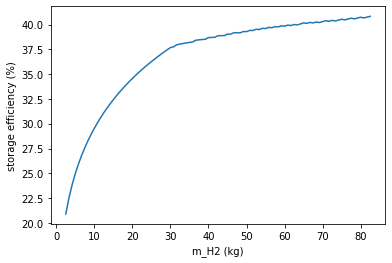

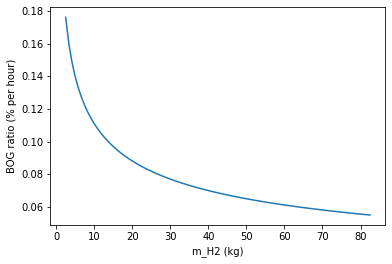

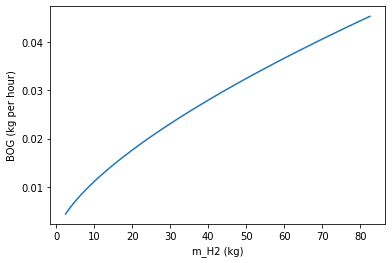

In [92]:
# Dependency of storage efficiency on E_req (or m_H2)
E_H2=120 #MJ/kg
E_req_list = [x*100 for x in range(3,100)] # MJ
m_H2_list=[E_req/E_H2 for E_req in E_req_list]
eta_list = []
BOG_list = []
BOG_ratio_list =[] #BOG hour/m_h2 tank
for E_req in E_req_list:
    eta,BOG = scale_analysis(E_req)
    eta_list.append(eta*100)
    BOG_hour= BOG/24.
    BOG_list.append(BOG_hour)
    BOG_ratio_list.append(BOG_hour/(E_req/E_H2)*100)


plt.plot(m_H2_list,eta_list)
#plt.title('Storage efficiency')
plt.xlabel('m_H2 (kg)')
plt.ylabel('storage efficiency (%)')

plt.figure()
plt.plot(m_H2_list,BOG_ratio_list)
#plt.title('Storage efficiency')
plt.xlabel('m_H2 (kg)')
plt.ylabel('BOG ratio (% per hour)')

plt.figure()
plt.plot(m_H2_list,BOG_list)
#plt.title('Storage efficiency')
plt.xlabel('m_H2 (kg)')
plt.ylabel('BOG (kg per hour)')

As we can see in the plot there is a scaling effect : the bigger the tanks are, the better the energy density is if the insulation thicknees is constant. On the other hand, as this insulation thickness is constant, we will have an boil-off increase. As a consequence, in order to maintain low the boil-off rate although increasing the hydrogen mass on board, the insulation thickness should be increased. That would imply a further increase of the total storage system mass. 
That makes us end up with the conclusion that a multiple tank storage system could be taken into consideration in order to find a trade-off between efficiency and boil-off.

# Determination of tank volume from H2 mass

Assuming p_v=4 ; p_fill=2, geometry=ellipsoide;  psi = 1   phi = 1  lmbda = 0.5

In [70]:
#Tank material
alu_2219 = [172.4, 73.8, 2825] # Aluminium alloy 2219 : [K_MPa, E_Y_GPa, rho_w]
stainless_steel = [300, 200, 8000] # Austenitic stainless steels (BMW 'Hydrogen 7' car) : [K_MPa, E_Y_GPa, rho_w]
material = stainless_steel # material choice
K_MPa = material[0] #Value of the maximum stress for the tank material (MPa).
E_Y_GPa =  material[1] #Value of Young's Modulus for tank's material (GPa)
rho_w = material[2] #Value of the density of the material used for the tank's wall (kg/m^3)
S = 1.5 #Value of the safety factor
E_Y=E_Y_GPa*(10**9)
K=K_MPa*(10**6)
#THERMO PARAMETERS
rho_ins = 50 #Value of density of the insultator (kg/m^3)
s_ins= 0.06 #Insulator thickness (m)
T_int= 22 #Initial H2 temperature (K)
T_ext= 273 #Exterior temperature (K) # assumed to be constant
lambda_ins= 10**(-4) #Value of the insulator thermal conductivity (W/mK) 
lambda_tank= 0.20 #Value of the tank material thermal conductivity ( W/mK) 
h_H2_tank= 1000 #Value of the H2/tank heat transfer coefficient (W/Km^2)
h_ins_air= 15 #Value of the insulator/air heat transfer coefficient (W/m^2 K)

    
V_tot_list=[]
dia_list=[]
L_tot_list=[]
pi=3.14
p_v=4
p_fill=2
###Determination of the volume fraction of liquid hydrogen inside the tank
#LINEARTISATION OF Y0
y_01=0.925 
y_02=0.83
p_v1=2 #bar
p_v2=5 #bar
bb=(y_02-y_01*p_v2/p_v1)/(1-p_v2/p_v1)
aa=(y_01-bb)/p_v1
y_0=aa*p_v+bb

#DETERMINATION OF y (volume fraction of liquid hydrogen)
alpha=0.035
y=alpha*p_fill+y_0
print(y,y_0)
#DETERMINATION HYDROGEN DENSITY
rho_l=-0.019*(p_fill**3)+0.3287*(p_fill**2)-3.7129*p_fill+73.424
rho_g=1.4909*p_fill+0.4182
print('rho_l',rho_l,'rho_g',rho_g)
for m_H2 in [20,50,70,80,100,110,120,130,140,150,175,200,225,250,275,300]:#np.linspace(10.0, 1500.0, num=150):
    V_t= y*m_H2/rho_l + (1-y)*m_H2/rho_g
    psi = 1 #0.6 # b/c
    phi = 1 #0.3 # a/c
    lmbda = 0.5 #0.7 # ls/lt
    
    a = ((3*V_t*phi*phi*(1-lmbda)) / (pi*psi*(2*lmbda+4)))**(1/3)
    c = a/phi
    b = psi*c
    ls=(V_t-(4/3)*pi*a*b*c)/(pi*a*c)    
    p_p=S*(p_v-1)*(10**5) # proof pressure (Pa)

    sw=0.002 # minimum thickness (m)
    td=p_p*(((a+c)/(2*sw))*(1+2*(1+3.6*(p_p/E_Y)*(((a+c)/(2*sw))**3))*(abs(a-c)/(a+c)))+0.5)
    while td>K/S:
        sw=sw+(sw/100) # increase thickness by 1%
        td=p_p*(((a+c)/(2*sw))*(1+2*(1+3.6*p_p*(((a+c)/(2*sw))**3)/E_Y)*(abs(a-c)/(a+c)))+0.5)
    p=1.6
    Sell=4*pi*(((((a**p)*(b**p))+((a**p)*(c**p))+((b**p)*(c**p)))/3)**(1/p))  #tank intern surface - appriximated formula
    Scyl=ls*pi*(3*(a+c)-sqrt(10*a*c+3*(a**2+c**2)))
    Si=Sell+Scyl
    #DETERMINATION OF TOTAL VOLUME AND TANK MASS
    DeltaV=Si*(sw+s_ins)  #Volume occupied by the tank
    V_total=V_t+DeltaV  #total Volume
    V_tot_list.append(V_total)
    L_tot_list.append(ls+2*b) #before it was ls*2*b
    dia_list.append(2*c)
    #print(a,b,c,ls)
    #print(np.pi*a**2)
    #print((4/3)*pi*a*b*c + pi*a*c*ls)
print(V_tot_list,'m3')
print(L_tot_list,'m')
print(dia_list,'m')


0.9316666666666669 0.8616666666666668
rho_l 67.161 rho_g 3.4
[0.9309535154950074, 2.1618678707048424, 2.9577899655926694, 3.351480387680829, 4.1325543033362635, 4.5205089208110305, 4.907020975365756, 5.292248924765552, 5.676323062511192, 6.059352167570403, 7.012924616276061, 7.961626990757986, 8.907077572912993, 9.849643696896369, 10.789914382425218, 11.72729025631318] m3
[1.6075573052409287, 2.1817909345159068, 2.4407453923763818, 2.551838157438614, 2.7488843248663977, 2.8376186282492823, 2.921125483511034, 3.000112788517419, 3.0751464972889244, 3.1466870378061653, 3.3126011453446487, 3.463377224625231, 3.602057469034672, 3.730810018699473, 3.851240996848863, 3.964577236363332] m
[0.8037786526204644, 1.0908954672579532, 1.2203726961881907, 1.2759190787193073, 1.3744421624331986, 1.4188093141246412, 1.460562741755517, 1.5000563942587095, 1.5375732486444624, 1.5733435189030824, 1.6563005726723243, 1.7316886123126154, 1.801028734517336, 1.865405009349736, 1.9256204984244314, 1.9822886181

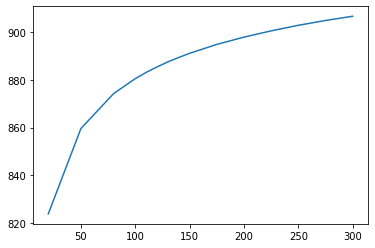

In [73]:
import matplotlib.pyplot as plt
masses= np.array([20,50,80,100,110,120,130,140,150,175,200,225,250,275,300])
volumes = np.array([0.8092357884332706, 1.9387401122594168, 3.050029223318232, 3.785222720692322, 4.151434544464005, 4.517043069343777, 4.881716759720426, 5.246325372229448, 5.610063869496306, 6.517731469406355, 7.423458084639368, 8.326959367378619, 9.22832016324853, 10.128432492826311, 11.027494224605803]  )
energy_density =masses*33330 /volumes/1000 #kWh/m3
plt.plot( masses, energy_density )


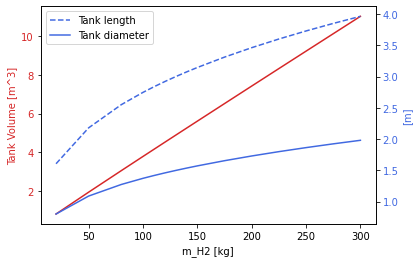

In [80]:
import matplotlib.pyplot as plt

color = 'tab:red'

fig, ax1 = plt.subplots()
ax1.set_xlabel('m_H2 [kg]')
ax1.set_ylabel('Tank Volume [m^3]', color=color)
ax1.plot( [20,50,80,100,110,120,130,140,150,175,200,225,250,275,300], [0.8092357884332706, 1.9387401122594168, 3.050029223318232, 3.785222720692322, 4.151434544464005, 4.517043069343777, 4.881716759720426, 5.246325372229448, 5.610063869496306, 6.517731469406355, 7.423458084639368, 8.326959367378619, 9.22832016324853, 10.128432492826311, 11.027494224605803]   ,color=color)

ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.tick_params(axis='y', labelcolor='royalblue')
ax2.set_ylabel('[m]', color='royalblue')
ax2.plot([20,50,80,100,110,120,130,140,150,175,200,225,250,275,300], [1.6075573052409287, 2.1817909345159068, 2.551838157438614, 2.7488843248663977, 2.8376186282492823, 2.921125483511034, 3.000112788517419, 3.0751464972889244, 3.1466870378061653, 3.3126011453446487, 3.463377224625231, 3.602057469034672, 3.730810018699473, 3.851240996848863, 3.964577236363332],'--',color='royalblue',label='Tank length')
ax2.plot([20,50,80,100,110,120,130,140,150,175,200,225,250,275,300], [0.8037786526204644, 1.0908954672579532, 1.2759190787193073, 1.3744421624331986, 1.4188093141246412, 1.460562741755517, 1.5000563942587095, 1.5375732486444624, 1.5733435189030824, 1.6563005726723243, 1.7316886123126154, 1.801028734517336, 1.865405009349736, 1.9256204984244314, 1.982288618181666],'-',color='royalblue',label='Tank diameter')
ax2.legend(loc='upper left')



In [ ]:
p_fill = 2
rho_l=-0.019*(p_fill**3)+0.3287*(p_fill**2)-3.7129*p_fill+73.424
print(rho_l)